In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Reference: Influence of hole shape on sound absorption of underwater anechoic layers
#### https://www.sciencedirect.com/science/article/abs/pii/S0022460X1830227X

### Import pre-defined class and function

In [4]:
%run -i hole_shape_sound_absorption.py

### Define the determinant of the coefficient matrix of eq(14) in the paper

In [5]:
determinant, mat = determinant_from_matrix()
mat

Matrix([
[                                                                                                              -sqrt(-kz**2 + omega**2/cl**2)*besselj(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                                               -sqrt(-kz**2 + omega**2/cl**2)*bessely(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*besselj(1, b*sqrt(-kz**2 + omega**2/ct**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*bessely(1, b*sqrt(-kz**2 + omega**2/ct**2))],
[(-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*besselj(0, a*sqrt(-kz**2 + omega**2/cl**2)) + 2*mu*sqrt(-kz**2 + omega**2/cl**2)*besselj(1, a*sqrt(-kz**2 + omega**2/cl**2))/a, (-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*bessely(0, a*sqrt(-kz**2 + omega**2/cl**

### Define the frequency array by np.arange

In [6]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [7]:
frequency_array = np.arange(20, 10021, 100)
frequency_array

array([   20,   120,   220,   320,   420,   520,   620,   720,   820,
         920,  1020,  1120,  1220,  1320,  1420,  1520,  1620,  1720,
        1820,  1920,  2020,  2120,  2220,  2320,  2420,  2520,  2620,
        2720,  2820,  2920,  3020,  3120,  3220,  3320,  3420,  3520,
        3620,  3720,  3820,  3920,  4020,  4120,  4220,  4320,  4420,
        4520,  4620,  4720,  4820,  4920,  5020,  5120,  5220,  5320,
        5420,  5520,  5620,  5720,  5820,  5920,  6020,  6120,  6220,
        6320,  6420,  6520,  6620,  6720,  6820,  6920,  7020,  7120,
        7220,  7320,  7420,  7520,  7620,  7720,  7820,  7920,  8020,
        8120,  8220,  8320,  8420,  8520,  8620,  8720,  8820,  8920,
        9020,  9120,  9220,  9320,  9420,  9520,  9620,  9720,  9820,
        9920, 10020])

## Define an object of sound_performance for calculating sound absorption
### The default values are listed as below (all in SI units)

Material of anechoic layer: rubber

Young's modulus of rubber (GPa): 0.14

Loss factor of rubber 0.23

Poisson ratio of rubber 0.49

Density of rubber (kg/m3): 1100

Density of air (kg/m3): 1.21

Shape: cone

p = 4 mm

q = 8 mm

lh = 40 mm

cell_radius = 15 mm

num_segments = 100

Density of water (kg/m3): 998

Sound speed of water (m/s): 1483

#### https://en.wikipedia.org/wiki/Lam%C3%A9_parameters

In [92]:
frequency_array = np.arange(20, 10020, 25)
frequency_array.shape

(400,)

### Example 01: default case

In [95]:
# frequency_array = np.asarray([20, 4620])
cone_4_8_4 = sound_performance(determinant, frequency_array)
cone_4_8_5 = sound_performance(determinant, frequency_array)

In [96]:
print(f'{cone_4_8.material = }')
print(f'{cone_4_8.shape = }')
print(f'{cone_4_8.Young = }')

cone_4_8.material = 'rubber'
cone_4_8.shape = 'cone'
cone_4_8.Young = 140000000.0


In [98]:
cone_4_8_4.segments = 50
cone_4_8_5.segments = 50

In [99]:
cone_4_8_5.Young = 1.4e7

In [111]:
cone_4_8.p_hole = 0.001

In [113]:
cone_4_8.q_hole = 0.01

In [117]:
cone_4_8.Young = 150
cone_4_8.shape = 'horn'

In [102]:
## Find roots of wavenumber in the equation of determinant
cone_4_8_4.wavenumer_array, cone_4_8_4.failed_root = cone_4_8_4.axial_wavenumber_array()
cone_4_8_5.wavenumer_array, cone_4_8_5.failed_root = cone_4_8_5.axial_wavenumber_array()

Solving determinant at frequency = 20 is done.
Solving determinant at frequency = 45 is done.
Solving determinant at frequency = 70 is done.
Solving determinant at frequency = 95 is done.
Solving determinant at frequency = 120 is done.
Solving determinant at frequency = 145 is done.
Solving determinant at frequency = 170 is done.
Solving determinant at frequency = 195 is done.
Solving determinant at frequency = 220 is done.
Solving determinant at frequency = 245 is done.
Solving determinant at frequency = 270 is done.
Solving determinant at frequency = 295 is done.
Solving determinant at frequency = 320 is done.
Solving determinant at frequency = 345 is done.
Solving determinant at frequency = 370 is done.
Solving determinant at frequency = 395 is done.
Solving determinant at frequency = 420 is done.
Solving determinant at frequency = 445 is done.
Solving determinant at frequency = 470 is done.
Solving determinant at frequency = 495 is done.
Solving determinant at frequency = 520 is do

In [101]:
# ## Calculate sound absorption of cone_4_8
# cone_4_8.absorption_frequency()

In [109]:
## Save the data
fp = '/Users/chenghunglin/Documents/'
fn4 = 'cone_4_8_4.xlsx'
fn5 = 'cone_4_8_5.xlsx'
cone_4_8_4.save_data(fp, fn4)
cone_4_8_5.save_data(fp, fn5)

/Users/chenghunglin/Documents/Git_BNL/sound_absorption/hole_shape_sound_absorption.py:271: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wave[frequency] = self.wavenumer_array[i][:]


self.frequency_array.shape[0] = 400 is same as self.wavenumer_array.shape[0] = 400
Save file to /Users/chenghunglin/Documents/cone_4_8_4.xlsx
self.frequency_array.shape[0] = 400 is same as self.wavenumer_array.shape[0] = 400
Save file to /Users/chenghunglin/Documents/cone_4_8_5.xlsx


### Example 02: change shape, p, q

In [14]:
horn_1_11 = sound_performance(determinant, frequency_array)

In [15]:
horn_1_11.shape = 'horn'
horn_1_11.p_hole = 1e-3
horn_1_11.q_hole = 11e-3

In [16]:
## Find roots of wavenumber in the equation of determinant
horn_1_11.wavenumer_array, horn_1_11.failed_root = horn_1_11.axial_wavenumber_array()

Solving determinant at frequency = 20 is done.
Solving determinant at frequency = 120 is done.
Solving determinant at frequency = 220 is done.
Solving determinant at frequency = 320 is done.
Solving determinant at frequency = 420 is done.
Solving determinant at frequency = 520 is done.
Solving determinant at frequency = 620 is done.
Solving determinant at frequency = 720 is done.
Solving determinant at frequency = 820 is done.
Solving determinant at frequency = 920 is done.
Solving determinant at frequency = 1020 is done.
Solving determinant at frequency = 1120 is done.
Solving determinant at frequency = 1220 is done.
Solving determinant at frequency = 1320 is done.
Solving determinant at frequency = 1420 is done.
Solving determinant at frequency = 1520 is done.
Solving determinant at frequency = 1620 is done.
Solving determinant at frequency = 1720 is done.
Solving determinant at frequency = 1820 is done.
Solving determinant at frequency = 1920 is done.
Solving determinant at frequenc

In [17]:
## Save the data
fp = '/Users/chenghunglin/Documents/'
fn = 'horn_1_11.xlsx'
horn_1_11.save_data(fp, fn)

self.frequency_array.shape[0] = 101 is same as self.wavenumer_array.shape[0] = 101
Save file to /Users/chenghunglin/Documents/horn_1_11.xlsx


/Users/chenghunglin/Documents/Git_BNL/sound_absorption/hole_shape_sound_absorption.py:271: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_wave[frequency] = self.wavenumer_array[i][:]


## Plot data to compare with the paper

self.frequency_array.shape[0] = 101 is same as self.wavenumer_array.shape[0] = 101
self.frequency_array.shape[0] = 101 is same as self.wavenumer_array.shape[0] = 101
self.frequency_array.shape[0] = 47 is same as self.wavenumer_array.shape[0] = 47


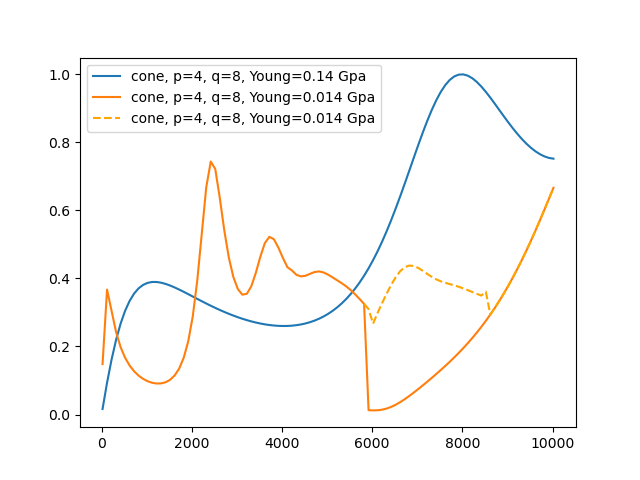

In [90]:
plt.figure()
plt.plot(cone_4_8.frequency_array, cone_4_8.absorption_frequency(), label='cone, p=4, q=8, Young=0.14 Gpa')
plt.plot(cone_4_8_1.frequency_array, cone_4_8_1.absorption_frequency(), label='cone, p=4, q=8, Young=0.014 Gpa')
plt.plot(cone_4_8_3.frequency_array, cone_4_8_3.absorption_frequency(), '--', color='orange', label='cone, p=4, q=8, Young=0.014 Gpa')
# plt.plot(horn_1_11.frequency_array, horn_1_11.absorption_frequency(), label='horn, p=1, q=11')
plt.legend()

self.frequency_array.shape[0] = 101 is same as self.wavenumer_array.shape[0] = 101
self.frequency_array.shape[0] = 400 is same as self.wavenumer_array.shape[0] = 400
self.frequency_array.shape[0] = 101 is same as self.wavenumer_array.shape[0] = 101
self.frequency_array.shape[0] = 400 is same as self.wavenumer_array.shape[0] = 400


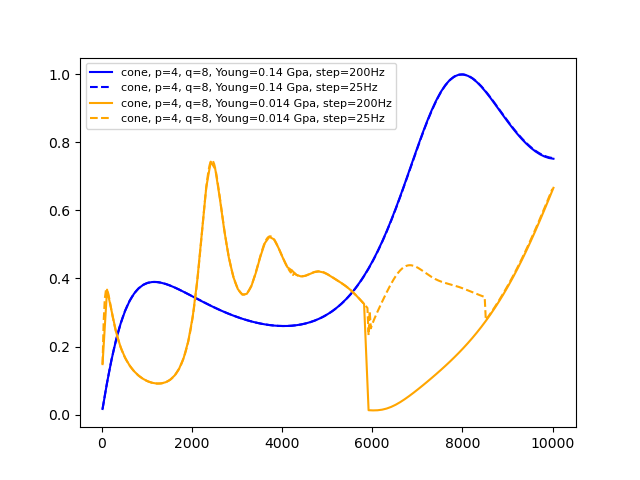

In [108]:
plt.figure()
plt.plot(cone_4_8.frequency_array, cone_4_8.absorption_frequency(), color='blue', label='cone, p=4, q=8, Young=0.14 Gpa, step=200Hz')
plt.plot(cone_4_8_4.frequency_array, cone_4_8_4.absorption_frequency(), '--', color='blue',label='cone, p=4, q=8, Young=0.14 Gpa, step=25Hz')
plt.plot(cone_4_8_1.frequency_array, cone_4_8_1.absorption_frequency(), color='orange', label='cone, p=4, q=8, Young=0.014 Gpa, step=200Hz')
plt.plot(cone_4_8_5.frequency_array, cone_4_8_5.absorption_frequency(), '--', color='orange', label='cone, p=4, q=8, Young=0.014 Gpa, step=25Hz')
# plt.plot(horn_1_11.frequency_array, horn_1_11.absorption_frequency(), label='horn, p=1, q=11')
legend_properties = {'weight':'regular', 'size':8}    
plt.legend(prop=legend_properties, loc='upper left') #, bbox_to_anchor=(1, 0.5))
# plt.legend()